In [1]:
using ProtoSyn
using Plots
ProtoSyn.acceleration.active = ProtoSyn.SISD_0

ProtoSyn will now only display error messages. Debug: ⨯ | Info: ⨯ | Warnings: ⨯ | Errors: ✓
[ Loading: External packages
 | Loading SIMD
 | Loading CUDA
[ Loading: Setting up global variables
 | Current acceleration set to ProtoSyn.CUDA_2
[ Loading: Core module
 | Loading Calculators
 | Loading Mutators
 | Loading Drivers
[ Loading: Peptides module
[ Loading: Materials module
[ Loading: Sugars module
[ Loading: Common module
[ Loading: External models
 | Loading TorchANI
 | Loading ONNX models
 | Loading SeqDes
[ Loading: ProtoSyn loaded successfully!

.      ____            _       ____              
      |  _ \ _ __ ___ | |_ ___/ ___| _   _ _ __  
      | |_) | '__/ _ \| __/ _ \___ \| | | | '_ \ 
      |  __/| | | (_) | || (_) |__) | |_| | | | |
      |_|   |_|  \___/ \__\___/____/ \__, |_| |_|
                                       |_/       
    
      ---------------------------------------------

 Version      : 1.10
 License      : GNU-GPL-3
 Developed by : José Pereira (jose.m

┌ Info: Precompiling ProtoSyn [c9758760-7c0d-11e9-0ffc-fb9355b7d293]
└ @ Base loading.jl:1423


ProtoSyn.SISD_0

In [2]:
top = Topology("test", 1)
Segment!(top, "s1", 1)
Residue!(top[1], "r1", 1)
Atom!(top[1, 1], "a1", 1, 1, "X")
Atom!(top[1, 1], "a2", 2, 2, "X")
state = State(2)
top.id = state.id = ProtoSyn.genid()
pose = Pose(top, state)
ProtoSyn.write(pose, "distance_based_potentials.pdb")

In [3]:
d = 0.1
pose.state[pose.graph[1, 1, 2]].t[2] += d

0.1

In [4]:
energy_function = ProtoSyn.Calculators.EnergyFunction([
    ProtoSyn.Calculators.Restraints.get_default_all_atom_clash_restraint(α = 1.0)
])
energy_function.update_forces = true

es = Vector{Float64}([
    energy_function(pose)
])

ds = Vector{Float64}([pose.state[pose.graph[1, 1, 2]].t[2]])

1-element Vector{Float64}:
 0.1

In [5]:
for i in 1:10
    pose.state[pose.graph[1, 1, 2]].t = pose.state[pose.graph[1, 1, 2]].t .+ [0.0, d, 0.0]
    push!(ds, pose.state[pose.graph[1, 1, 2]].t[2])
    e = energy_function(pose)
    push!(es, e)
    ProtoSyn.append(pose, "distance_based_potentials.pdb")
end

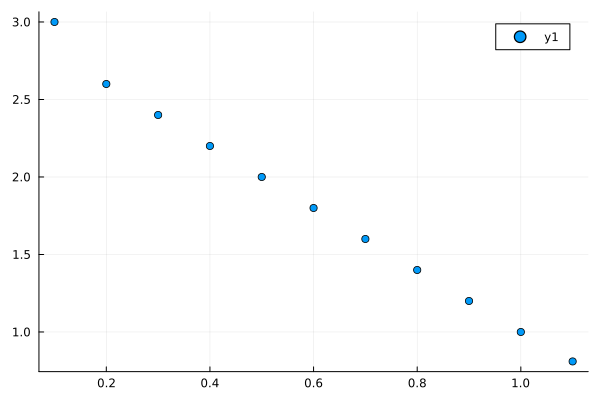

In [6]:
scatter(ds, es)

In [7]:
display(pose.state.f)
ProtoSyn.write_forces(pose, "forces.txt")

3×2 Matrix{Float64}:
  0.0  0.0
 -1.8  1.8
  0.0  0.0

: 